# Spotify song Like or Dislike Predictor

In [116]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

## Data cleaning and prep

### Load credentials and playlist details

In [117]:
credentials = json.load(open("authorization.json"))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

playlists = json.load(open('playlists_like_dislike.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [118]:
uri = playlist_uri
playlist_id = uri.split(':')[2]
username = 'spotify'

In [119]:
results = sp.user_playlist(username, playlist_id, 'tracks')

In [120]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name']) # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

In [121]:
features = sp.audio_features(playlist_tracks_id)

In [122]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [123]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
45,6dtd7jjjz2tZ1A4bjGshpO,Bittersweet,Blanks,[Blanks],0.517,0.584,2,-4.920,1,0.181000,0.000000,0.1300,0.376,77.017,163620,4
46,1fBnzFTxI1wqtU0ZR1pxrf,C'mere,Interpol,[Interpol],0.402,0.926,2,-4.441,0,0.000082,0.119000,0.0658,0.649,125.116,192493,4
47,3dmS0RP5ePTfONUPJ5vzP7,Family,Catey Shaw,[Catey Shaw],0.709,0.683,0,-5.896,1,0.492000,0.000000,0.5090,0.736,104.972,224428,4
48,3FM33HqRlV7J1QJoPOnd2u,1901,Phoenix,[Phoenix],0.591,0.831,0,-5.647,1,0.060500,0.000047,0.1900,0.705,144.084,193107,4
49,73y59JEXs1yNwjuinuQA4c,Bleed Magic,I DONT KNOW HOW BUT THEY FOUND ME,[I DONT KNOW HOW BUT THEY FOUND ME],0.518,0.934,0,-7.082,1,0.001350,0.202000,0.1720,0.233,161.996,203720,4


In [124]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

In [125]:
features_df['num_bars'] = num_bars
features_df['num_sections'] = num_sections
features_df['num_segments'] = num_segments
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,1zNeVf6Qk402L4Urb7CcG8,Rest My Chemistry,Interpol,[Interpol],0.471,0.877,11,-5.576,0,0.01930,0.084700,0.2760,0.419,150.092,301093,4,186,15,918
1,74lfGn1j0rBJ3YqR2mo4oU,Paracetamol,Declan McKenna,[Declan McKenna],0.489,0.681,7,-6.320,1,0.10000,0.000009,0.6370,0.132,83.996,318373,4,109,9,992
2,13vwUuL2l4XoDKUr42ULLt,cotton eye joe,Ignant Benches,[Ignant Benches],0.651,0.565,0,-10.199,1,0.13800,0.000002,0.1560,0.303,89.974,170667,4,61,9,554
3,4Gz79kVUfXjvdChYYl2vh4,Waking Up,Elastica,[Elastica],0.459,0.972,9,-3.968,0,0.00323,0.518000,0.0605,0.561,137.895,195707,4,111,8,644
4,4lR4pIGPQV7XcCsxm45Dnh,Out Like a Light 2,The Honeysticks,"[The Honeysticks, Ricky Montgomery]",0.445,0.395,11,-8.717,1,0.28800,0.000000,0.3700,0.301,108.130,271283,3,147,12,803


In [126]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [127]:
uri = playlist_uri
playlist_id = uri.split(':')[2]
username = 'spotify'

### Get playlist

In [128]:
results = sp.user_playlist(username, playlist_id, 'tracks')

### Add all the details/metadata to the data

In [129]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name']) # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

### Get audio features

In [130]:
features = sp.audio_features(playlist_tracks_id)

## Creation of DataFrame and Plotting

In [131]:
import numpy as np
import pandas as pd

In [132]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [133]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
45,6dtd7jjjz2tZ1A4bjGshpO,Bittersweet,Blanks,[Blanks],0.517,0.584,2,-4.920,1,0.181000,0.000000,0.1300,0.376,77.017,163620,4
46,1fBnzFTxI1wqtU0ZR1pxrf,C'mere,Interpol,[Interpol],0.402,0.926,2,-4.441,0,0.000082,0.119000,0.0658,0.649,125.116,192493,4
47,3dmS0RP5ePTfONUPJ5vzP7,Family,Catey Shaw,[Catey Shaw],0.709,0.683,0,-5.896,1,0.492000,0.000000,0.5090,0.736,104.972,224428,4
48,3FM33HqRlV7J1QJoPOnd2u,1901,Phoenix,[Phoenix],0.591,0.831,0,-5.647,1,0.060500,0.000047,0.1900,0.705,144.084,193107,4
49,73y59JEXs1yNwjuinuQA4c,Bleed Magic,I DONT KNOW HOW BUT THEY FOUND ME,[I DONT KNOW HOW BUT THEY FOUND ME],0.518,0.934,0,-7.082,1,0.001350,0.202000,0.1720,0.233,161.996,203720,4


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Interpol'),
  Text(1, 0, 'Declan McKenna'),
  Text(2, 0, 'Ignant Benches'),
  Text(3, 0, 'Elastica'),
  Text(4, 0, 'The Honeysticks'),
  Text(5, 0, 'Cage The Elephant'),
  Text(6, 0, 'Two Door Cinema Club'),
  Text(7, 0, 'Courteeners'),
  Text(8, 0, 'Wild Cub'),
  Text(9, 0, 'Young the Giant'),
  Text(10, 0, 'The Sunshine Underground'),
  Text(11, 0, 'Palaye Royale'),
  Text(12, 0, 'Stereophonics'),
  Text(13, 0, 'Bad Suns'),
  Text(14, 0, 'Little Barrie'),
  Text(15, 0, 'Julian Lamadrid'),
  Text(16, 0, 'Badly Drawn Boy'),
  Text(17, 0, 'Razorlight'),
  Text(18, 0, 'Fitz and The Tantrums'),
  Text(19, 0, 'Magic Man'),
  Text(20, 0, 'The Stone Roses'),
  Text(21, 0, 'Vacationer'),
  Text(22, 0, 'RAC'),
  Text(23, 0, 'White Lies'),
  Text(24, 0, 'Zella Day'),
  Text(25, 0, 'Franz Fe

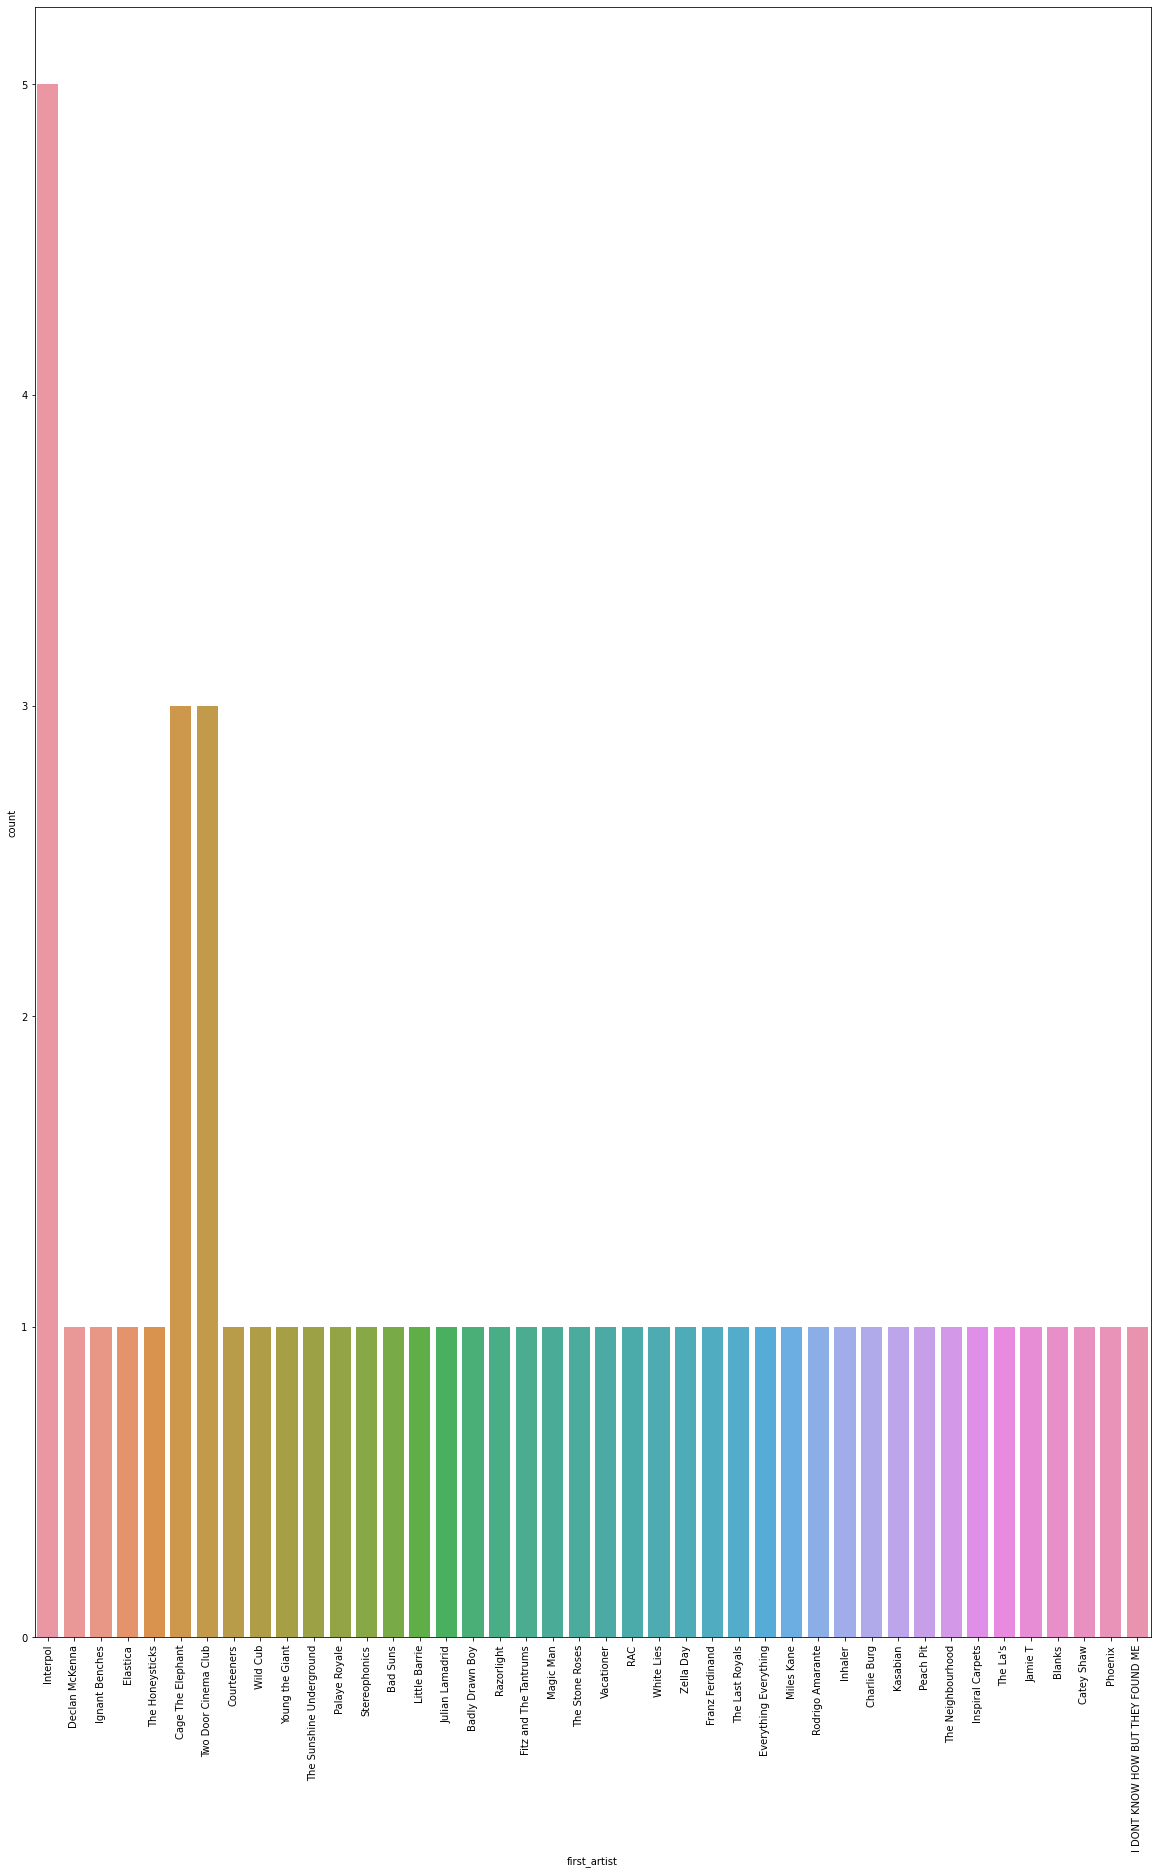

In [135]:
plt.figure(figsize=(20,30))
sns.countplot(x=features_df['first_artist'])
plt.xticks(rotation=90)

In [136]:
#features_df = features_df.drop(['first_artist', 'all_artists'], axis=1)

### Adding other features of song to DataFrame

In [137]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

Text(0.5, 0, 'num_segments')

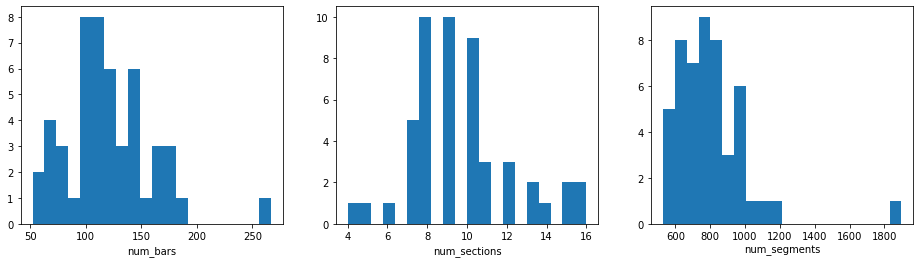

In [138]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,2)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')

In [139]:
features_df['num_bars'] = num_bars
features_df['num_sections'] = num_sections
features_df['num_segments'] = num_segments
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,1zNeVf6Qk402L4Urb7CcG8,Rest My Chemistry,Interpol,[Interpol],0.471,0.877,11,-5.576,0,0.01930,0.084700,0.2760,0.419,150.092,301093,4,186,15,918
1,74lfGn1j0rBJ3YqR2mo4oU,Paracetamol,Declan McKenna,[Declan McKenna],0.489,0.681,7,-6.320,1,0.10000,0.000009,0.6370,0.132,83.996,318373,4,109,9,992
2,13vwUuL2l4XoDKUr42ULLt,cotton eye joe,Ignant Benches,[Ignant Benches],0.651,0.565,0,-10.199,1,0.13800,0.000002,0.1560,0.303,89.974,170667,4,61,9,554
3,4Gz79kVUfXjvdChYYl2vh4,Waking Up,Elastica,[Elastica],0.459,0.972,9,-3.968,0,0.00323,0.518000,0.0605,0.561,137.895,195707,4,111,8,644
4,4lR4pIGPQV7XcCsxm45Dnh,Out Like a Light 2,The Honeysticks,"[The Honeysticks, Ricky Montgomery]",0.445,0.395,11,-8.717,1,0.28800,0.000000,0.3700,0.301,108.130,271283,3,147,12,803


### Saving liked songs to CSV

In [140]:
features_df.to_csv("playlist_" + str(playlist_index) + ".csv", encoding='utf-8',index="false")

#### Similar steps for disliked songs should be there

## Loading and working with data

### Loading liked songs

In [141]:
like_songs = pd.read_csv("playlist_0.csv",index_col=[0])

like_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,1zNeVf6Qk402L4Urb7CcG8,Rest My Chemistry,Interpol,['Interpol'],0.471,0.877,11,-5.576,0,0.01930,0.084700,0.2760,0.419,150.092,301093,4,186,15,918
1,74lfGn1j0rBJ3YqR2mo4oU,Paracetamol,Declan McKenna,['Declan McKenna'],0.489,0.681,7,-6.320,1,0.10000,0.000009,0.6370,0.132,83.996,318373,4,109,9,992
2,13vwUuL2l4XoDKUr42ULLt,cotton eye joe,Ignant Benches,['Ignant Benches'],0.651,0.565,0,-10.199,1,0.13800,0.000002,0.1560,0.303,89.974,170667,4,61,9,554
3,4Gz79kVUfXjvdChYYl2vh4,Waking Up,Elastica,['Elastica'],0.459,0.972,9,-3.968,0,0.00323,0.518000,0.0605,0.561,137.895,195707,4,111,8,644
4,4lR4pIGPQV7XcCsxm45Dnh,Out Like a Light 2,The Honeysticks,"['The Honeysticks', 'Ricky Montgomery']",0.445,0.395,11,-8.717,1,0.28800,0.000000,0.3700,0.301,108.130,271283,3,147,12,803


### Loading disliked songs

In [142]:
dislike_songs = pd.read_csv("playlist_1.csv",index_col=[0])

dislike_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,5eXBXreN3d1zdj6Sa8dS0u,Permission to Dance,BTS,['BTS'],0.702,0.741,9,-5.330,1,0.00544,0.000000,0.3370,0.646,124.925,187585,4,96,8,656
1,3Wrjm47oTz2sjIgck11l5e,Beggin',Måneskin,['Måneskin'],0.714,0.800,11,-4.808,0,0.12700,0.000000,0.3590,0.589,134.002,211560,4,116,10,798
2,2bgTY4UwhfBYhGT4HUYStN,Butter,BTS,['BTS'],0.759,0.459,8,-5.187,1,0.00323,0.000000,0.0906,0.695,109.997,164442,4,73,8,654
3,5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),The Kid LAROI,"['The Kid LAROI', 'Justin Bieber']",0.591,0.764,1,-5.484,1,0.03830,0.000000,0.1030,0.478,169.928,141806,4,98,8,555
4,5urYiIXu1ZhfMAOsp7WDTc,"Dil Ko Karaar Aaya (From ""Sukoon"")",Yasser Desai,"['Yasser Desai', 'Neha Kakkar', 'Rajat Nagpal']",0.550,0.448,11,-9.117,1,0.77700,0.000459,0.1110,0.388,147.986,231487,4,143,9,821


### Adding '1' for the liked songs in 'song_like' column

In [143]:
like_songs['song_like'] = np.ones((len(like_songs), 1), dtype=int)

like_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,1zNeVf6Qk402L4Urb7CcG8,Rest My Chemistry,Interpol,['Interpol'],0.471,0.877,11,-5.576,0,0.01930,0.084700,0.2760,0.419,150.092,301093,4,186,15,918,1
1,74lfGn1j0rBJ3YqR2mo4oU,Paracetamol,Declan McKenna,['Declan McKenna'],0.489,0.681,7,-6.320,1,0.10000,0.000009,0.6370,0.132,83.996,318373,4,109,9,992,1
2,13vwUuL2l4XoDKUr42ULLt,cotton eye joe,Ignant Benches,['Ignant Benches'],0.651,0.565,0,-10.199,1,0.13800,0.000002,0.1560,0.303,89.974,170667,4,61,9,554,1
3,4Gz79kVUfXjvdChYYl2vh4,Waking Up,Elastica,['Elastica'],0.459,0.972,9,-3.968,0,0.00323,0.518000,0.0605,0.561,137.895,195707,4,111,8,644,1
4,4lR4pIGPQV7XcCsxm45Dnh,Out Like a Light 2,The Honeysticks,"['The Honeysticks', 'Ricky Montgomery']",0.445,0.395,11,-8.717,1,0.28800,0.000000,0.3700,0.301,108.130,271283,3,147,12,803,1


### Adding '0' for the disliked songs in 'song_like' column

In [144]:
dislike_songs['song_like'] = np.zeros((len(dislike_songs), 1), dtype=int)

dislike_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,5eXBXreN3d1zdj6Sa8dS0u,Permission to Dance,BTS,['BTS'],0.702,0.741,9,-5.330,1,0.00544,0.000000,0.3370,0.646,124.925,187585,4,96,8,656,0
1,3Wrjm47oTz2sjIgck11l5e,Beggin',Måneskin,['Måneskin'],0.714,0.800,11,-4.808,0,0.12700,0.000000,0.3590,0.589,134.002,211560,4,116,10,798,0
2,2bgTY4UwhfBYhGT4HUYStN,Butter,BTS,['BTS'],0.759,0.459,8,-5.187,1,0.00323,0.000000,0.0906,0.695,109.997,164442,4,73,8,654,0
3,5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),The Kid LAROI,"['The Kid LAROI', 'Justin Bieber']",0.591,0.764,1,-5.484,1,0.03830,0.000000,0.1030,0.478,169.928,141806,4,98,8,555,0
4,5urYiIXu1ZhfMAOsp7WDTc,"Dil Ko Karaar Aaya (From ""Sukoon"")",Yasser Desai,"['Yasser Desai', 'Neha Kakkar', 'Rajat Nagpal']",0.550,0.448,11,-9.117,1,0.77700,0.000459,0.1110,0.388,147.986,231487,4,143,9,821,0


In [145]:
like_songs.shape

(50, 20)

In [146]:
dislike_songs.shape

(50, 20)

### Merge both liked and disliked songs to one DataFrame

In [147]:
songs = like_songs.append(dislike_songs,ignore_index=False)

songs.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
45,2MJz8BxxMsERULatmBikDH,At My Worst,Pink Sweat$,['Pink Sweat$'],0.813,0.415,0,-5.926,1,0.77700,0.000000,0.1310,0.667,91.921,170345,4,65,8,529,0
46,6FvSS3Goz7OC8oCC2eWqe8,Jalebi Baby (Tesher x Jason Derulo),Tesher,"['Tesher', 'Jason Derulo']",0.691,0.829,0,-7.179,1,0.02890,0.000000,0.2540,0.866,93.059,169154,4,65,10,768,0
47,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,['The Weeknd'],0.514,0.730,1,-5.934,1,0.00146,0.000095,0.0897,0.334,171.005,200040,4,141,7,770,0
48,249gnXrbfmV8NG6jTEMSwD,Life Goes On,BTS,['BTS'],0.566,0.716,1,-5.733,1,0.00691,0.000000,0.3700,0.450,81.068,207481,4,70,6,766,0
49,0IQRRlpomabOlzy39mcmmq,Barsaat Ki Dhun,Rochak Kohli,"['Rochak Kohli', 'Jubin Nautiyal', 'Anu Malik']",0.667,0.767,8,-6.574,0,0.16300,0.000019,0.1200,0.730,87.041,259215,4,92,13,1120,0


In [148]:
songs.shape

(100, 20)

In [149]:
songs = songs.drop_duplicates()

songs.shape

(100, 20)

### Drop string columns as our ML model doesn't need those

In [150]:
songs = songs.drop(['id','first_artist','all_artists'], axis = 1)

In [151]:
songs.head()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,Rest My Chemistry,0.471,0.877,11,-5.576,0,0.01930,0.084700,0.2760,0.419,150.092,301093,4,186,15,918,1
1,Paracetamol,0.489,0.681,7,-6.320,1,0.10000,0.000009,0.6370,0.132,83.996,318373,4,109,9,992,1
2,cotton eye joe,0.651,0.565,0,-10.199,1,0.13800,0.000002,0.1560,0.303,89.974,170667,4,61,9,554,1
3,Waking Up,0.459,0.972,9,-3.968,0,0.00323,0.518000,0.0605,0.561,137.895,195707,4,111,8,644,1
4,Out Like a Light 2,0.445,0.395,11,-8.717,1,0.28800,0.000000,0.3700,0.301,108.130,271283,3,147,12,803,1


In [152]:
songs.tail()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
45,At My Worst,0.813,0.415,0,-5.926,1,0.77700,0.000000,0.1310,0.667,91.921,170345,4,65,8,529,0
46,Jalebi Baby (Tesher x Jason Derulo),0.691,0.829,0,-7.179,1,0.02890,0.000000,0.2540,0.866,93.059,169154,4,65,10,768,0
47,Blinding Lights,0.514,0.730,1,-5.934,1,0.00146,0.000095,0.0897,0.334,171.005,200040,4,141,7,770,0
48,Life Goes On,0.566,0.716,1,-5.733,1,0.00691,0.000000,0.3700,0.450,81.068,207481,4,70,6,766,0
49,Barsaat Ki Dhun,0.667,0.767,8,-6.574,0,0.16300,0.000019,0.1200,0.730,87.041,259215,4,92,13,1120,0


### Dropping unnecessary column

In [153]:
prediction = songs.drop(['title'], axis = 1)

In [154]:
prediction.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,0.471,0.877,11,-5.576,0,0.01930,0.084700,0.2760,0.419,150.092,301093,4,186,15,918,1
1,0.489,0.681,7,-6.320,1,0.10000,0.000009,0.6370,0.132,83.996,318373,4,109,9,992,1
2,0.651,0.565,0,-10.199,1,0.13800,0.000002,0.1560,0.303,89.974,170667,4,61,9,554,1
3,0.459,0.972,9,-3.968,0,0.00323,0.518000,0.0605,0.561,137.895,195707,4,111,8,644,1
4,0.445,0.395,11,-8.717,1,0.28800,0.000000,0.3700,0.301,108.130,271283,3,147,12,803,1


## Plotting some comparisons of different qualities of the songs in the two playlists

C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

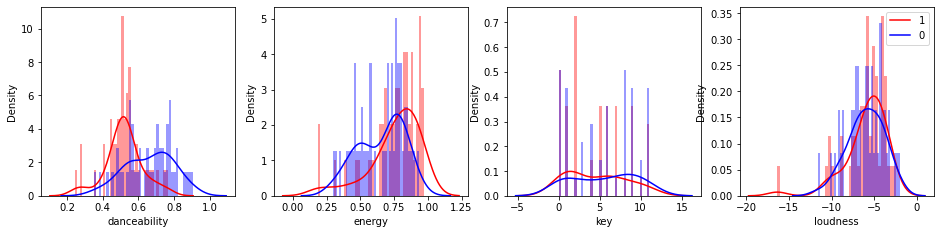

In [155]:
plt.figure(figsize=(16,16))

plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['danceability'], color='blue', bins=40)

plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['energy'], color='blue', bins=40)

plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['key'], color='blue', bins=40)

plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['loudness'], color='blue', bins=40)

plt.legend((1,0))

C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

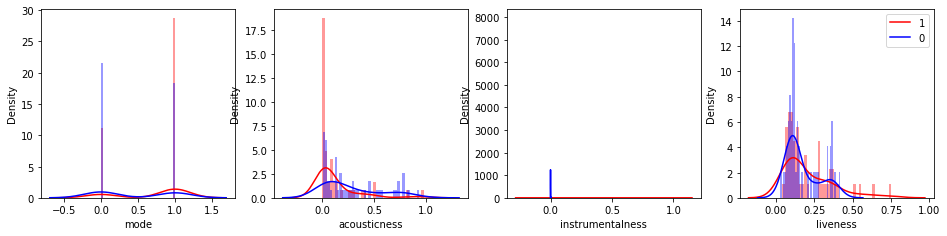

In [156]:
plt.figure(figsize=(16,16))

plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['mode'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['mode'], color='blue', bins=40)

plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['acousticness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['acousticness'], color='blue', bins=40)

plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['instrumentalness'], color='blue', bins=40)

plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['liveness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['liveness'], color='blue', bins=40)

plt.legend((1,0))

C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

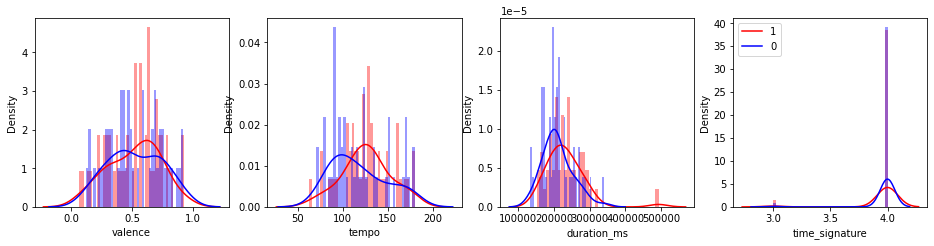

In [157]:
plt.figure(figsize=(16,16))

plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['valence'], color='blue', bins=40)

plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['tempo'], color='blue', bins=40)

plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['duration_ms'], color='blue', bins=40)

plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['time_signature'], color='blue', bins=40)

plt.legend((1,0))

C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

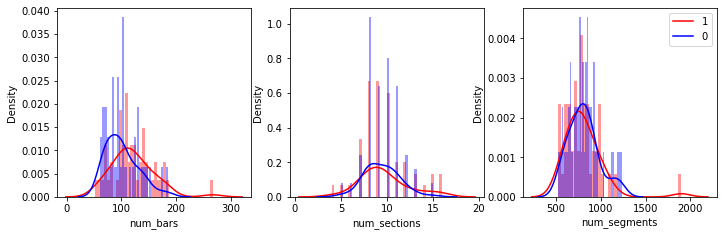

In [158]:
plt.figure(figsize=(16,16))

plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['num_bars'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_bars'], color='blue', bins=40)

plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['num_sections'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_sections'], color='blue', bins=40)

plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['num_segments'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_segments'], color='blue', bins=40)

plt.legend((1,0))

## Training the model

In [176]:
# X_train = prediction.drop('song_like', axis=1)
TrainData = prediction.iloc[0:int(prediction.shape[0]*0.4)].append(prediction.iloc[int(prediction.shape[0]*0.5)+1:int(prediction.shape[0]*0.9)],ignore_index=False)
X_train = TrainData.drop('song_like', axis=1)
y_train = TrainData['song_like']

# TestData = songs.iloc[int(songs.shape[0]*0.4)+1:int(songs.shape[0]*0.5)].append(songs.iloc[int(songs.shape[0]*0.9)+1:int(songs.shape[0])],ignore_index=False)
X_test = songs.drop(['song_like','title'], axis=1)
y_test = songs['song_like']

In [177]:
X_train.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,0.471,0.877,11,-5.576,0,0.01930,0.084700,0.2760,0.419,150.092,301093,4,186,15,918
1,0.489,0.681,7,-6.320,1,0.10000,0.000009,0.6370,0.132,83.996,318373,4,109,9,992
2,0.651,0.565,0,-10.199,1,0.13800,0.000002,0.1560,0.303,89.974,170667,4,61,9,554
3,0.459,0.972,9,-3.968,0,0.00323,0.518000,0.0605,0.561,137.895,195707,4,111,8,644
4,0.445,0.395,11,-8.717,1,0.28800,0.000000,0.3700,0.301,108.130,271283,3,147,12,803


In [178]:
X_test.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,0.471,0.877,11,-5.576,0,0.01930,0.084700,0.2760,0.419,150.092,301093,4,186,15,918
1,0.489,0.681,7,-6.320,1,0.10000,0.000009,0.6370,0.132,83.996,318373,4,109,9,992
2,0.651,0.565,0,-10.199,1,0.13800,0.000002,0.1560,0.303,89.974,170667,4,61,9,554
3,0.459,0.972,9,-3.968,0,0.00323,0.518000,0.0605,0.561,137.895,195707,4,111,8,644
4,0.445,0.395,11,-8.717,1,0.28800,0.000000,0.3700,0.301,108.130,271283,3,147,12,803


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [180]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [181]:
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[35 15]
 [15 35]]


              precision    recall  f1-score   support

           0       0.70      0.70      0.70        50
           1       0.70      0.70      0.70        50

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



In [182]:
from sklearn.neighbors import KNeighborsClassifier 

### K-Nearest Neighbors

In [183]:
knn_model = KNeighborsClassifier() 
  
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [184]:
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[35 15]
 [21 29]]


              precision    recall  f1-score   support

           0       0.62      0.70      0.66        50
           1       0.66      0.58      0.62        50

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



In [185]:
from sklearn.tree import DecisionTreeClassifier

### Decision Tree

In [186]:
dt = DecisionTreeClassifier(criterion = 'entropy')

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [187]:
dt_pred = dt.predict(X_test)
print(confusion_matrix(y_test, dt_pred))
print('\n')
print(classification_report(y_test, dt_pred))

[[47  3]
 [ 1 49]]


              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.94      0.98      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [188]:
from sklearn.ensemble import RandomForestClassifier

## Random Forest

In [189]:
rfc = RandomForestClassifier(criterion = 'entropy')

rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [190]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[48  2]
 [ 2 48]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      0.96      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



### Proceeding with Random Forest as it has a better weighted average F1-score

In [191]:
songs['prediction'] = rfc_pred

In [192]:
songs.sort_values('title').head()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like,prediction
48,1901,0.591,0.831,0,-5.647,1,0.0605,0.000047,0.190,0.705,144.084,193107,4,113,10,781,1,1
13,295,0.557,0.794,11,-5.698,0,0.1790,0.000000,0.106,0.432,91.366,270000,4,104,12,1233,0,0
12,"Agar Tum Saath Ho (From ""Tamasha"")",0.562,0.519,3,-8.744,1,0.5570,0.000268,0.172,0.415,122.925,341055,4,173,11,1187,0,0
24,Arcade,0.453,0.350,9,-11.639,0,0.8270,0.001220,0.144,0.279,72.017,185147,3,71,9,573,0,0
27,Astronaut In The Ocean,0.778,0.695,4,-6.865,0,0.1750,0.000000,0.150,0.472,149.996,132780,4,81,5,585,0,0


### Final results

In [193]:
final_prediction = songs[['title','song_like','prediction']]

In [194]:
final_prediction

,title,song_like,prediction
0,Rest My Chemistry,1,1
1,Paracetamol,1,1
2,cotton eye joe,1,1
3,Waking Up,1,1
4,Out Like a Light 2,1,1
...,...,...,...
45,At My Worst,0,0
46,Jalebi Baby (Tesher x Jason Derulo),0,0
47,Blinding Lights,0,1
48,Life Goes On,0,0
